# Forest Cover Prediction Project - (Data Exploration and Visualization)

### Overview
***Objective-*** Predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). <br> The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

### Data Description 

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features (565892 observations).

### Data Fields

Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

#### This notebook focus on the Data Exploration and Visualizations

## Exploratory Data analysis and Visualizations

In [148]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")


In [149]:
# import the datasets
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

### Basic Data informations

In [150]:
train_data.shape

(15120, 56)

56 columns and 15120 rows (datas)

In [151]:
train_data.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

All integers (numeric). No explicitly categorical datas in the raw data

In [152]:
pd.set_option('display.max_columns', None)

In [153]:
train_data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

Dependent variable (varible to predict)  - Cover-Type (7 types) <br>
Wilderness_Area (4 areas), soil type (40 types) -> Categorical variable and one-hot encoded <br>
Others variables are numeric

For analysis we need to reverse the one-hot encoding data

In [154]:
train_data1 = train_data.copy()

In [155]:
# Reversing one-hot encoding for wilderness into a single column wilderness
#train_data1['Wilderness'] = train_data1.iloc[:,11:15].idxmax(axis=1)
wilderness = train_data1.iloc[:,11:15].idxmax(axis=1)
train_data1.insert(11, "Wilderness", wilderness, True)

In [156]:
# Dropping the ohe wilderness columns
a = train_data1.columns[12:16].values.tolist()
train_data1.drop(a,1,inplace=True)

In [157]:
# Reversing one-hot encoding for soil type into a single column Soil_Type
soil_type = train_data1.iloc[:,12:52].idxmax(axis=1)
train_data1.insert(12, "Soil_Type", soil_type, True)

In [158]:
# Dropping the ohe soil type columns
a = train_data1.columns[13:53].values.tolist()
train_data1.drop(a,1,inplace=True)

In [159]:
train_data1.dtypes

Id                                     int64
Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Wilderness                            object
Soil_Type                             object
Cover_Type                             int64
dtype: object

In [160]:
train_data1.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points    Cover_Type  
count   15120.000000                        15120.000000  15120.000000  
mean      135.091997                         1511.147288      4.000000  
std        45.895189                         1099.936493      2.000066  
min         0.000000                            0.000000      1.000000  
25%       106.000000                          730.000000      2.000000  
50%       138.000000                         1256.000000      4.000000  
75%       167.000000                         1988.250000      6.000000  
max       248.000000                         6993.000000      7.000000

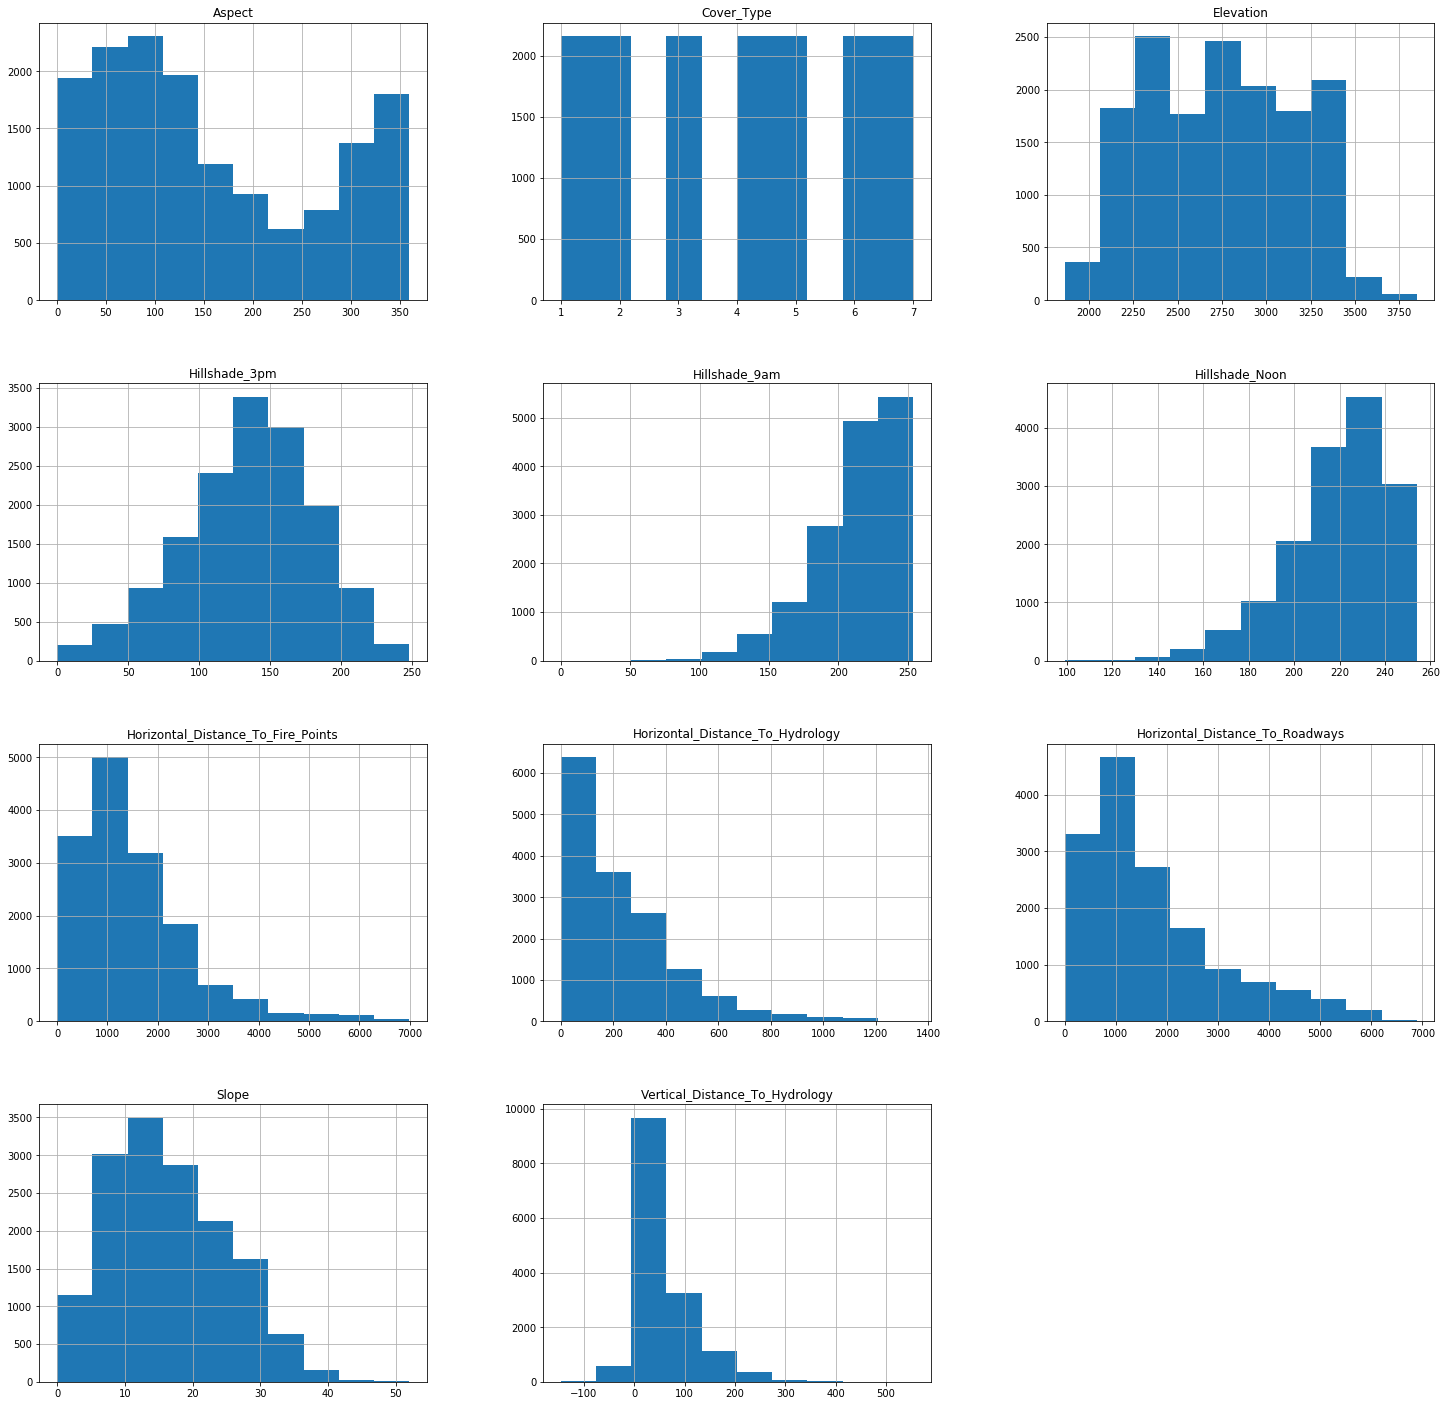

In [161]:
train_data1.iloc[:,1:].hist(figsize=(25,25));

 Skewness - measure of symmetry. The skewness for a normal distribution = 0

In [162]:
train_data1.skew().sort_values()

Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Id                                    0.000000
Cover_Type                            0.000000
Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Roadways       1.247811
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64

Many distributions have skewness have strong negative skewness. Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Fire_Points have strong positive skewness

Kurtosis - measure of whether the data are heavy-tailed or light-tailed. Data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.
Kurtosis for a standard normal distribution = 3

In [163]:
train_data1.kurt().sort_values()

Cover_Type                           -1.250017
Id                                   -1.200000
Aspect                               -1.150244
Elevation                            -1.082116
Slope                                -0.238310
Hillshade_3pm                        -0.087344
Horizontal_Distance_To_Roadways       1.022419
Hillshade_Noon                        1.153484
Hillshade_9am                         1.218810
Horizontal_Distance_To_Hydrology      2.803984
Horizontal_Distance_To_Fire_Points    3.385416
Vertical_Distance_To_Hydrology        3.403499
dtype: float64

Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Fire_Points both have higher kurtosis

####  Counts of Categorical variable

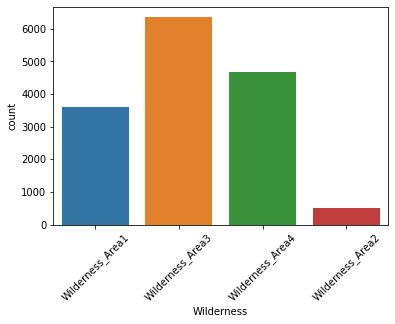

In [164]:
ax = sns.countplot(x='Wilderness', data = train_data1)
ax.xaxis.set_tick_params(rotation=45)

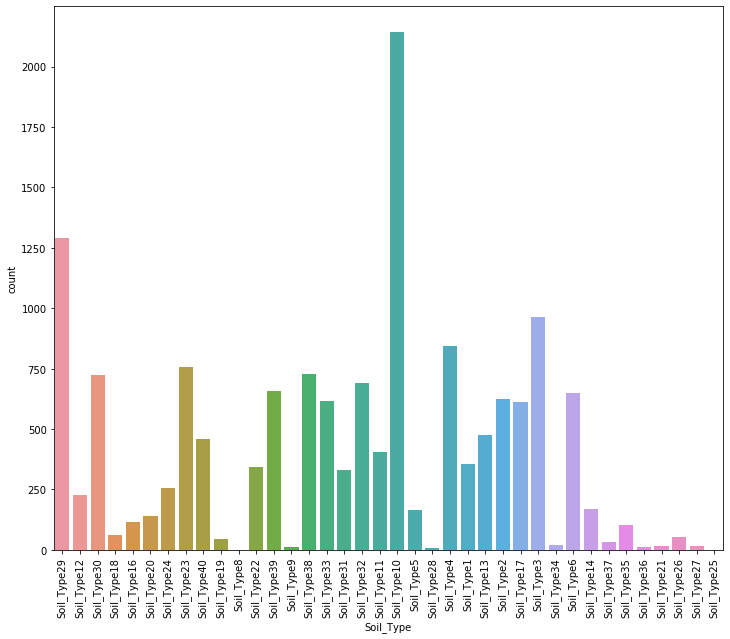

In [165]:
plt.subplots(figsize=(12, 10))
ax = sns.countplot(x='Soil_Type', data = train_data1)
ax.xaxis.set_tick_params(rotation=90)

### Correlations

In [166]:
corr_matrix = train_data1.corr()

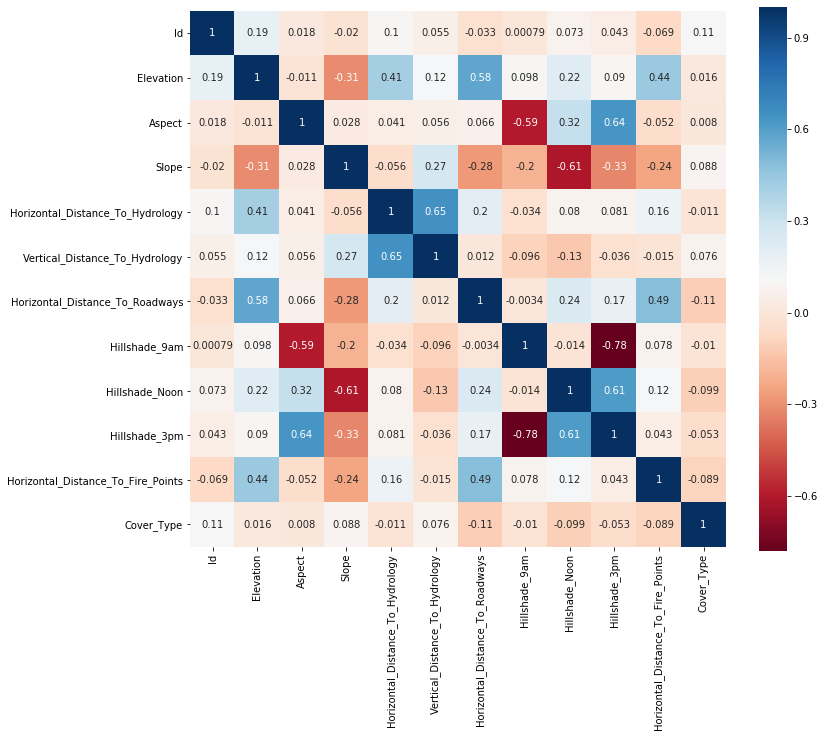

In [167]:
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, vmax=1, cmap="RdBu", square=True)

Rather strong negative correlation between hilshade9am and hillshade3pm - understandable since sun is on opposite side. Aspect with hillshade9am, slope with hilshade noon.

In [168]:
# Finding highest correlations pairs
c = corr_matrix.abs()
s = c.unstack()
so = s.sort_values()


In [169]:
so[so.between(0.5,0.99)]

Hillshade_9am                     Hillshade_3pm                       0.779965
Hillshade_3pm                     Hillshade_9am                       0.779965
Vertical_Distance_To_Hydrology    Horizontal_Distance_To_Hydrology    0.652142
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology      0.652142
Aspect                            Hillshade_3pm                       0.635022
Hillshade_3pm                     Aspect                              0.635022
                                  Hillshade_Noon                      0.614526
Hillshade_Noon                    Hillshade_3pm                       0.614526
                                  Slope                               0.612613
Slope                             Hillshade_Noon                      0.612613
Hillshade_9am                     Aspect                              0.593997
Aspect                            Hillshade_9am                       0.593997
Elevation                         Horizontal_Distanc

In [170]:
# Correlation with respect to the target variable - Cover_Type
corr_matrix["Cover_Type"].sort_values(ascending=False)

Cover_Type                            1.000000
Id                                    0.108363
Slope                                 0.087722
Vertical_Distance_To_Hydrology        0.075647
Elevation                             0.016090
Aspect                                0.008015
Hillshade_9am                        -0.010286
Horizontal_Distance_To_Hydrology     -0.010515
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Hillshade_Noon                       -0.098905
Horizontal_Distance_To_Roadways      -0.105662
Name: Cover_Type, dtype: float64

For calculating correlations of categorical variables we need to use the spearman correlation

In [171]:
print('Wilderness',spearmanr(train_data1['Cover_Type'], train_data1['Wilderness'])[0])
print('Soil_Type',spearmanr(train_data1['Cover_Type'], train_data1['Soil_Type'])[0])

Wilderness 0.1755605644209566
Soil_Type 0.09855728858231515


Wilderness has largest correlation.  Others - Horizontal_Distance_To_Roadways, Hillshade_Noon, Horizontal_Distance_To_Fire_Points, Slope 

#### Data Visualization

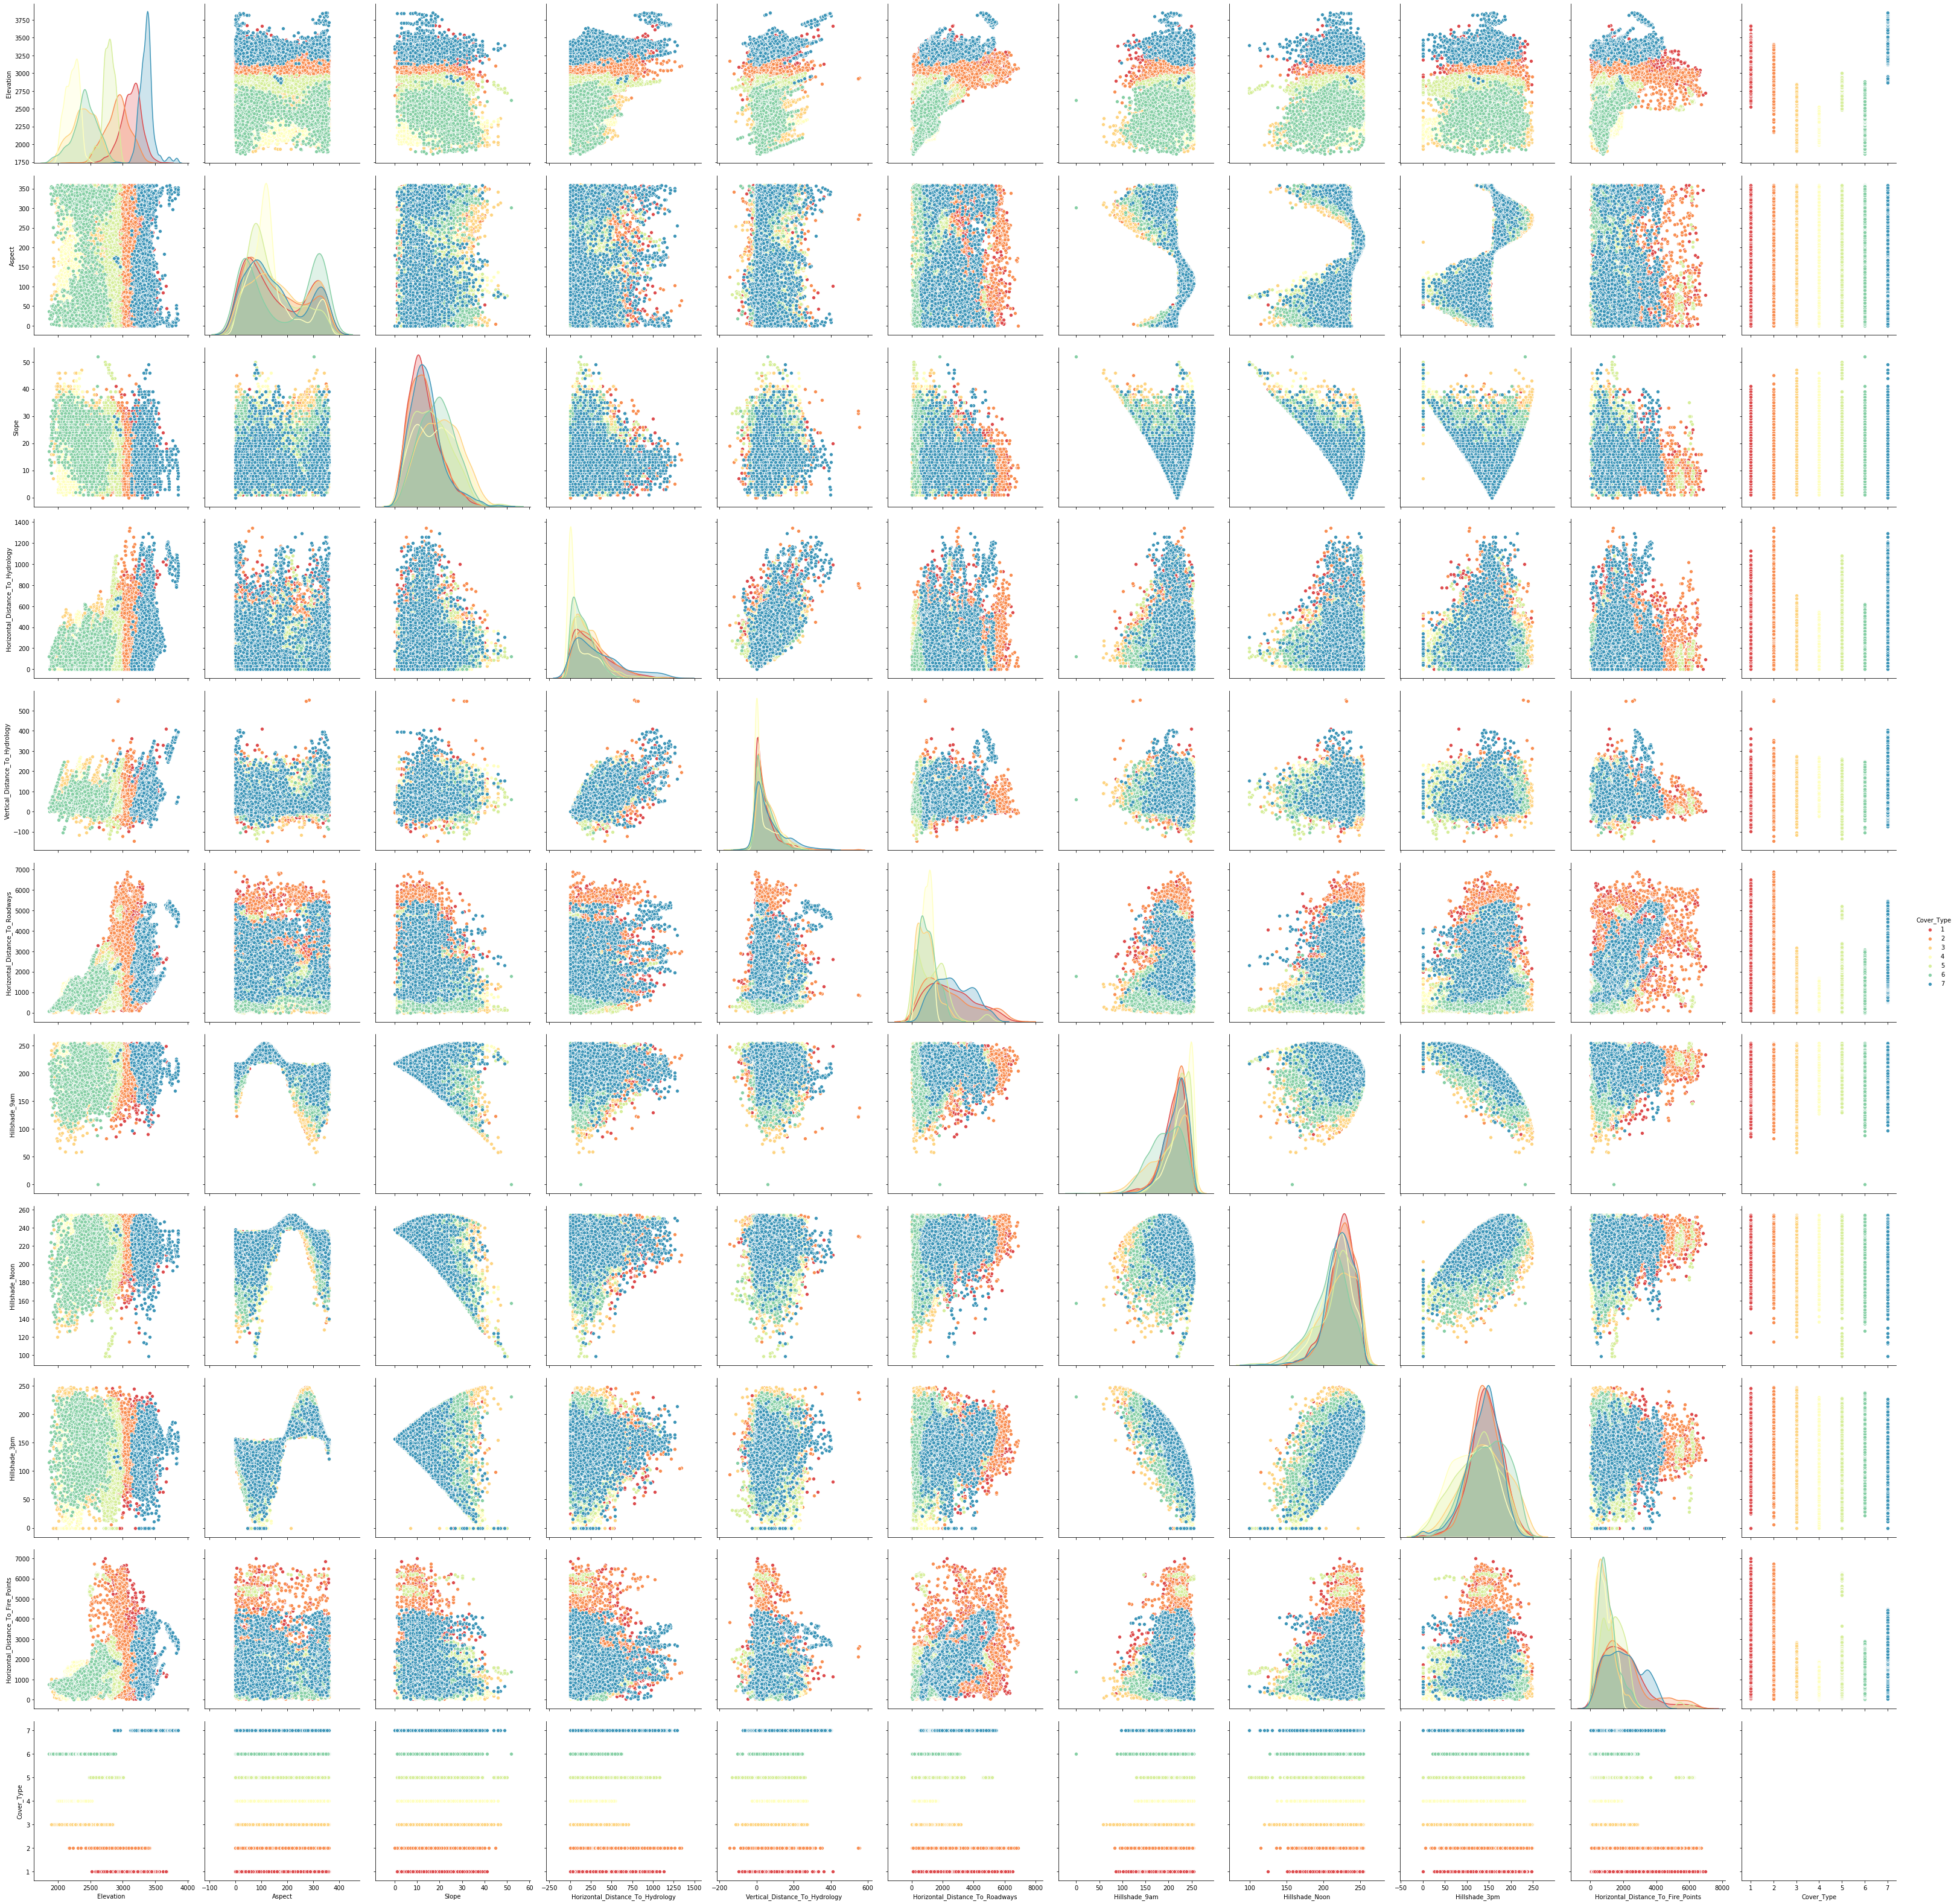

In [172]:
sns.pairplot(train_data1.iloc[:,1:], height=4, hue='Cover_Type',palette="Spectral")

In [173]:
corr_matrix["Cover_Type"].abs().sort_values(ascending=False)

Cover_Type                            1.000000
Id                                    0.108363
Horizontal_Distance_To_Roadways       0.105662
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Vertical_Distance_To_Hydrology        0.075647
Hillshade_3pm                         0.053399
Elevation                             0.016090
Horizontal_Distance_To_Hydrology      0.010515
Hillshade_9am                         0.010286
Aspect                                0.008015
Name: Cover_Type, dtype: float64

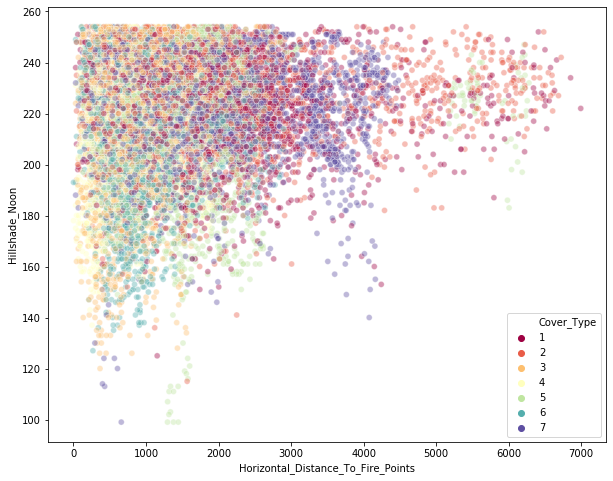

In [174]:
# Scatterplot for top correlated variable with respect to the Cover Type
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Horizontal_Distance_To_Fire_Points', y='Hillshade_Noon', hue ='Cover_Type', legend="full",palette="Spectral", alpha=0.4, data = train_data1);

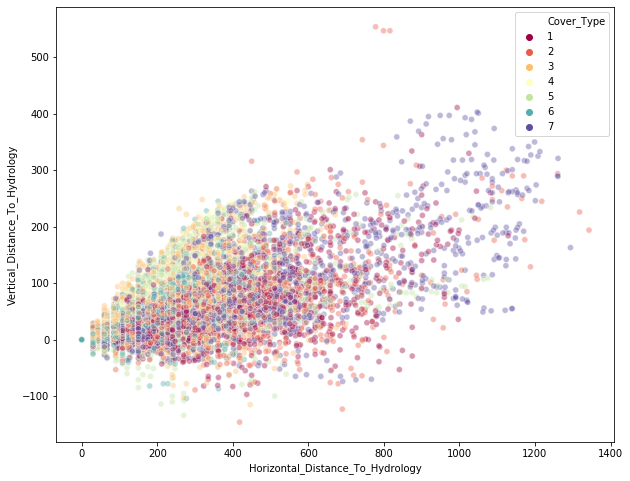

In [175]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', hue ='Cover_Type', legend="full",palette="Spectral", alpha=0.4, data = train_data1);


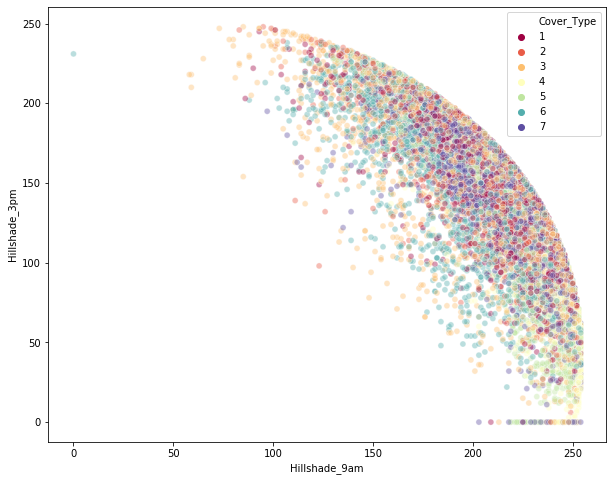

In [176]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hillshade_9am', y='Hillshade_3pm', hue ='Cover_Type', legend="full",palette="Spectral", alpha=0.4, data = train_data1);

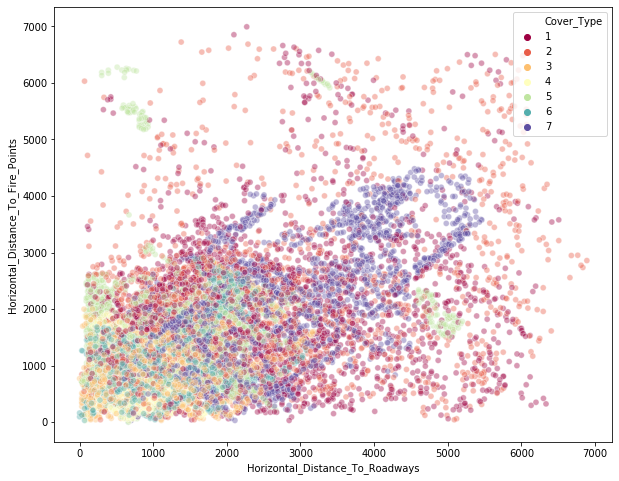

In [177]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Horizontal_Distance_To_Roadways', y='Horizontal_Distance_To_Fire_Points', hue ='Cover_Type', legend="full",palette="Spectral", alpha=0.4, data = train_data1);

In [178]:
corr_matrix["Cover_Type"].abs().sort_values(ascending=False)

Cover_Type                            1.000000
Id                                    0.108363
Horizontal_Distance_To_Roadways       0.105662
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Vertical_Distance_To_Hydrology        0.075647
Hillshade_3pm                         0.053399
Elevation                             0.016090
Horizontal_Distance_To_Hydrology      0.010515
Hillshade_9am                         0.010286
Aspect                                0.008015
Name: Cover_Type, dtype: float64

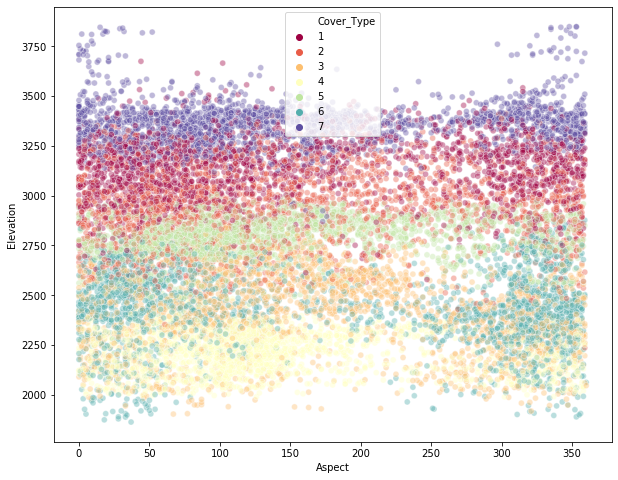

In [179]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Aspect', y='Elevation', hue ='Cover_Type', legend="full",palette="Spectral", alpha=0.4, data = train_data1);

There is a distinct cover type zones with elevation.

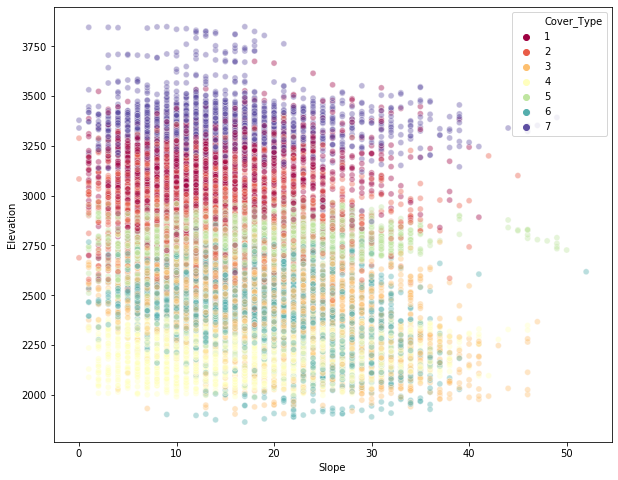

In [180]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Slope', y='Elevation', hue ='Cover_Type', legend="full",palette="Spectral", alpha=0.4, data = train_data1);

#### Categorical data 

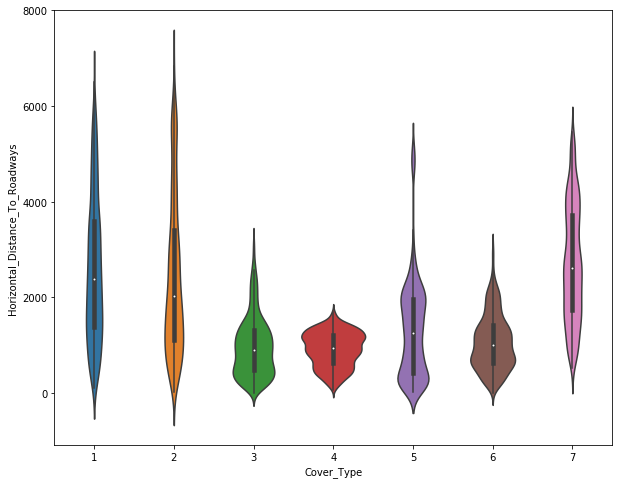

In [181]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data = train_data1);

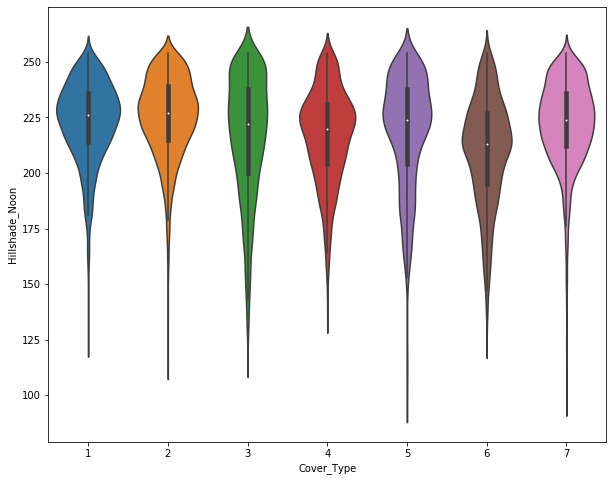

In [182]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Hillshade_Noon', data = train_data1);

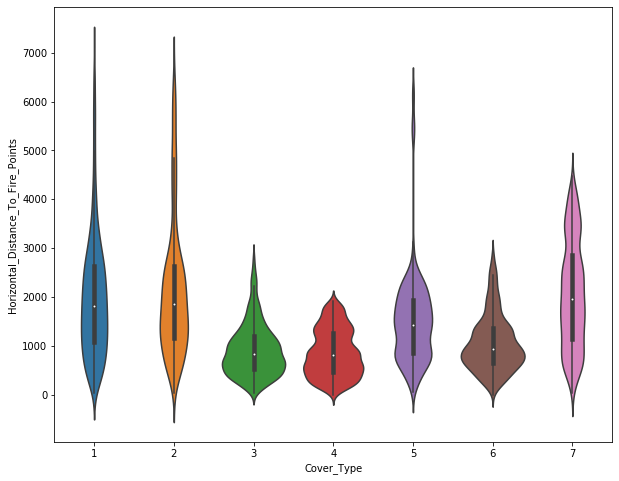

In [183]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data = train_data1);

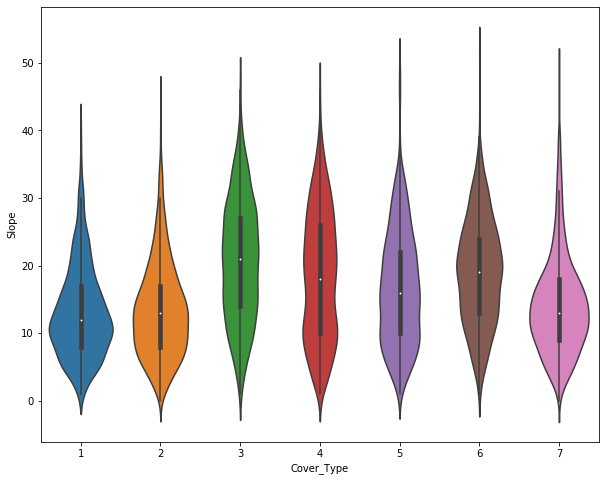

In [184]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Slope', data = train_data1);

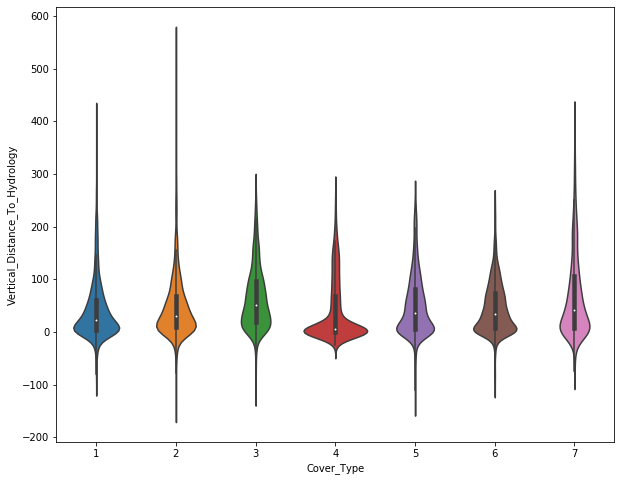

In [185]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data = train_data1);

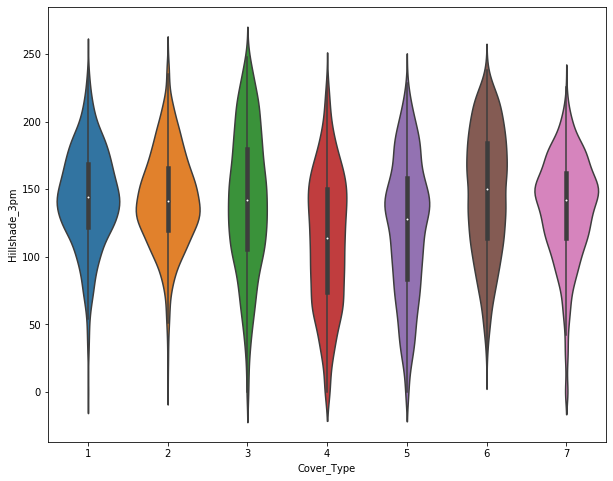

In [186]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Hillshade_3pm', data = train_data1);

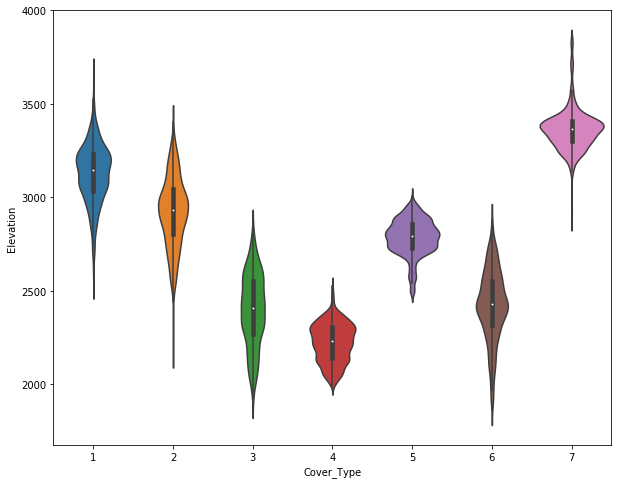

In [187]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Elevation', data = train_data1);

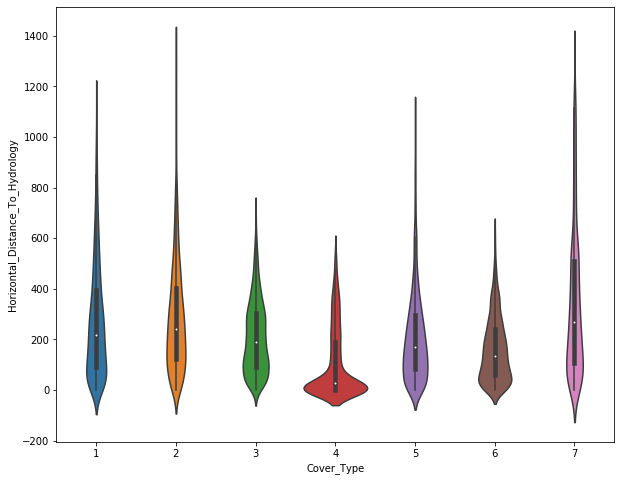

In [188]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data = train_data1);

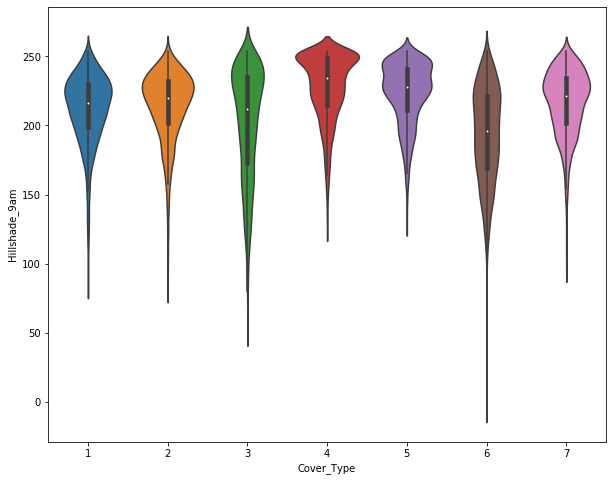

In [189]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Hillshade_9am', data = train_data1);

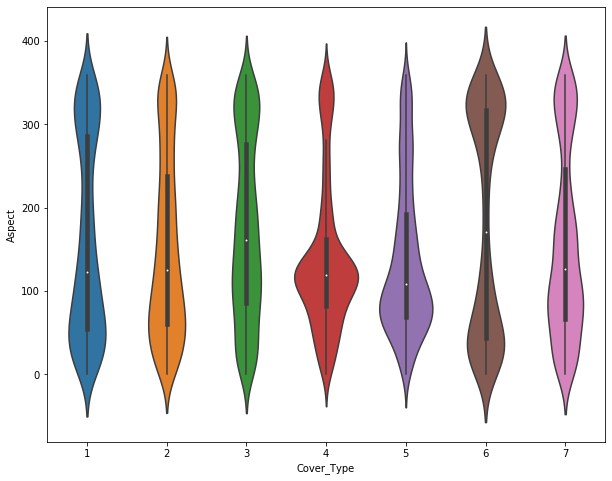

In [190]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x='Cover_Type', y='Aspect', data = train_data1);

In [191]:
train_data1.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness',
       'Soil_Type', 'Cover_Type'],
      dtype='object')

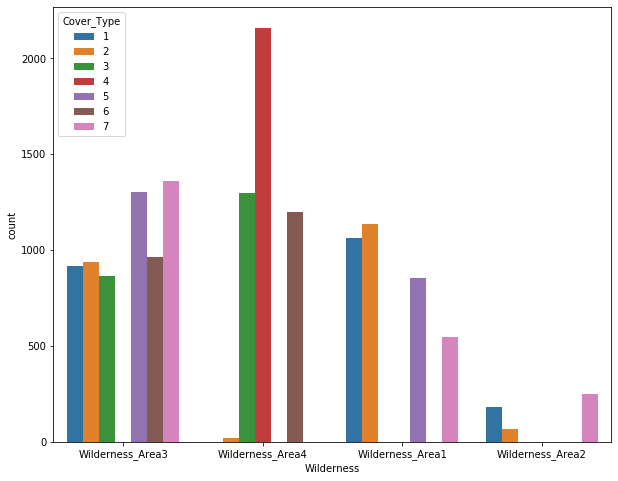

In [192]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='Wilderness', hue="Cover_Type", data=train_data1,
             order = train_data1['Wilderness'].value_counts().index)

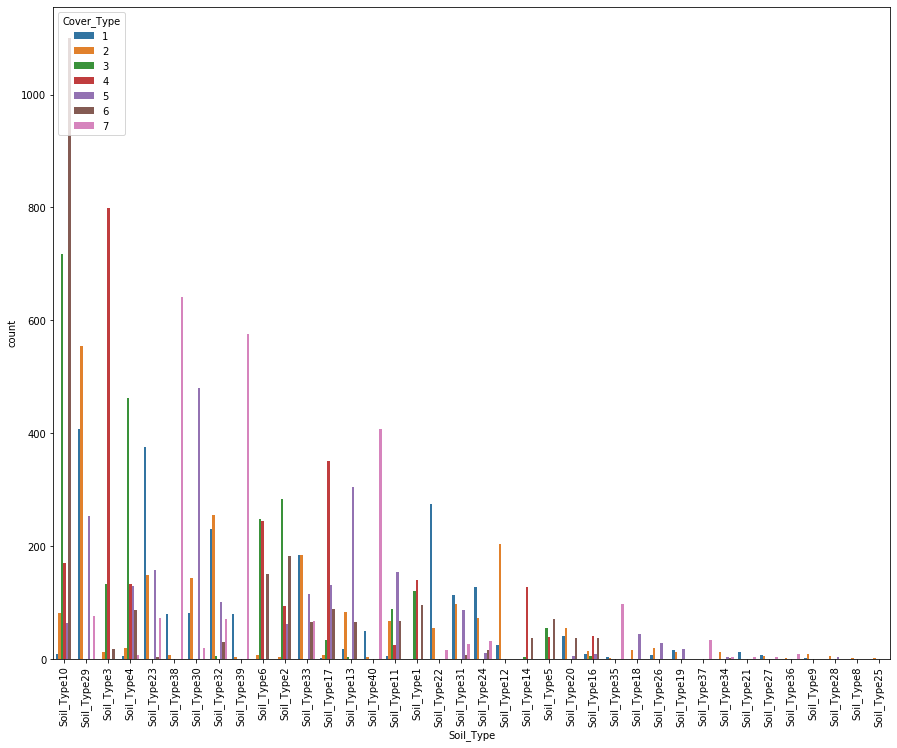

In [193]:
plt.subplots(figsize=(15, 12))
ax = sns.countplot(x='Soil_Type', hue="Cover_Type", data=train_data1, 
                   order = train_data1['Soil_Type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);